In [37]:
import qiskit
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

Define state and according evolution operator from |0>^(N)

In [30]:
def householder_unitary(psi: np.ndarray) -> np.ndarray:
    """
    Construct a real unitary matrix U such that U @ |0> = psi.

    Parameters:
        psi (np.ndarray): Real normalized state vector.

    Returns:
        U (np.ndarray): Real unitary matrix.
    """
    psi = psi.astype(np.float64)
    psi = psi / np.linalg.norm(psi)

    dim = len(psi)
    e1 = np.zeros(dim)
    e1[0] = 1.0

    v = psi - e1
    v = v / np.linalg.norm(v)

    U = np.eye(dim) - 2.0 * np.outer(v, v)
    return U

def print_matrix(U: np.ndarray, precision: int = 4):
    """
    Pretty-print a matrix with fixed precision.

    Parameters:
        U (np.ndarray): Matrix to print.
        precision (int): Decimal digits.
    """
    np.set_printoptions(precision=precision, suppress=True)
    print(U)

# Example probability distribution (must sum to 1)
p = np.array([1, 0, 0, 0, 0, 0, 0, 1]) / np.sqrt(2)
p /= np.sum(p)

# Target quantum state
psi = np.sqrt(p)

# Generate unitary matrix
U = householder_unitary(psi)

# Print the result
print_matrix(U)

[[ 0.7071  0.      0.      0.      0.      0.      0.      0.7071]
 [ 0.      1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.    ]
 [ 0.7071  0.      0.      0.      0.      0.      0.     -0.7071]]


In [61]:
GHZ = np.array([1, 0, 0, 0, 0, 0, 0, 1]) / np.sqrt(2)
GHZ_evolve_matrix = householder_unitary(GHZ)

zero_state = np.array([1, 1])
zero_state_evolve_matrix = householder_unitary(zero_state)
print(zero_state_evolve_matrix)

[[ 0.7071  0.7071]
 [ 0.7071 -0.7071]]


Acording circuit creation

In [ ]:
def create_reference_circuit(matrix):
    num_qubits = int(np.log2(len(matrix)))
    print(f"Number of qubits: {num_qubits}")
    gate = UnitaryGate(matrix)
    print(f"Gate: {gate}")
    qc = QuantumCircuit(num_qubits)
    qc.append(gate, qc.qubits)

    return qc


Number of qubits: 3
Gate: Instruction(name='unitary', num_qubits=3, num_clbits=0, params=[array([[ 0.7071+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,
         0.    +0.j,  0.    +0.j,  0.7071+0.j],
       [ 0.    +0.j,  1.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,
         0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  1.    +0.j,  0.    +0.j,  0.    +0.j,
         0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  1.    +0.j,  0.    +0.j,
         0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  1.    +0.j,
         0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,
         1.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,
         0.    +0.j,  1.    +0.j,  0.    +0.j],
       [ 0.7071+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  0.

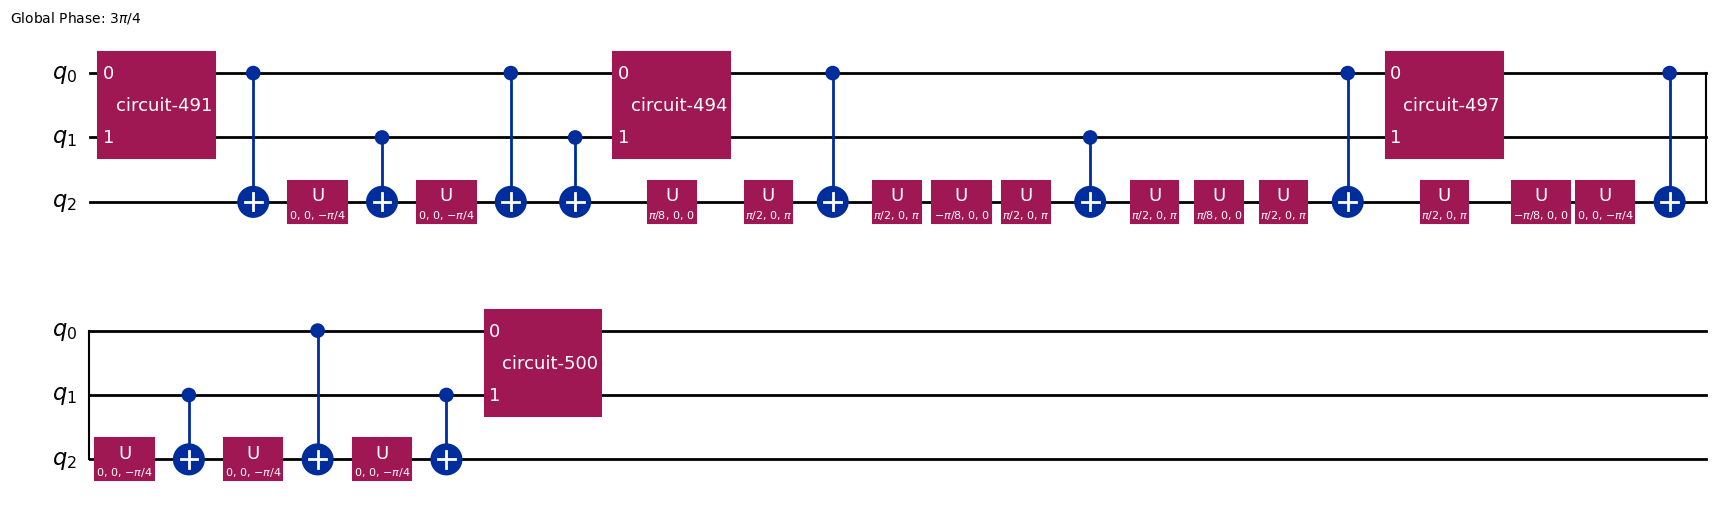

In [52]:
qc = create_reference_circuit(GHZ_evolve_matrix)
#print(qc)
qc.decompose().draw('mpl')

Number of qubits: 1
Gate: Instruction(name='unitary', num_qubits=1, num_clbits=0, params=[array([[ 0.7071+0.j,  0.7071+0.j],
       [ 0.7071+0.j, -0.7071+0.j]])])


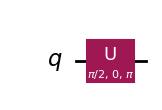

In [73]:
qc_zero = create_reference_circuit(zero_state_evolve_matrix)
qc_zero.decompose(reps=1).draw('mpl')

Loss function